# Predicting critical temperature of superconductors
### By Antonio Alejo, Vishesh Kumar, and Sana Sabuwala

Data retrieved from https://archive.ics.uci.edu/ml/datasets/superconductivty+data. The data used is a collection of 81 attributtes of 21263 different superconductors plus the critical tempraturure of each super conductor. The critical temprature of a material is the temprature at which the material begins to exhibit properties of super conductivity. Or in other words, when a material is below its critical temprature it has little to no electrical resistance. The goal with utilising this data set is to identify the best number of features that would be best suited for regression from the 81 available to predict the critical temprature of a material. Then based on those define an explicit linear equation with than many features. It is important to note that all 82 attributes are continuous and numerical.

In [1]:
library(leaps)

data <- read.csv("C:/Users/tonya/DAT402/DAT402Project1/train.csv")

Warning message:
"package 'leaps' was built under R version 3.6.3"

In [2]:
str(data)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

We no verify that there are no missing values

In [3]:
sum(is.na(data))

[1] 0

We use regsubsets from leaps to identify how the R^2 increases as we increase the number of variables. To predict the critical temp of a super conductor we use a forward subset selection, as exhaustive selectionwould be very computationally expensive for 81 attributes and 22000 observations. The only goal here is to observe how the number of input variables effects different attributes of predictability. We print the table of which coefficients are chosen below.

In [4]:
linearFit = regsubsets(critical_temp~.,data=data,nbest=1,nvmax=81,method="forward")

In [5]:
linearFit.summary = summary(linearFit)
linearFit.summary$which[1:81,]

(Intercept),number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


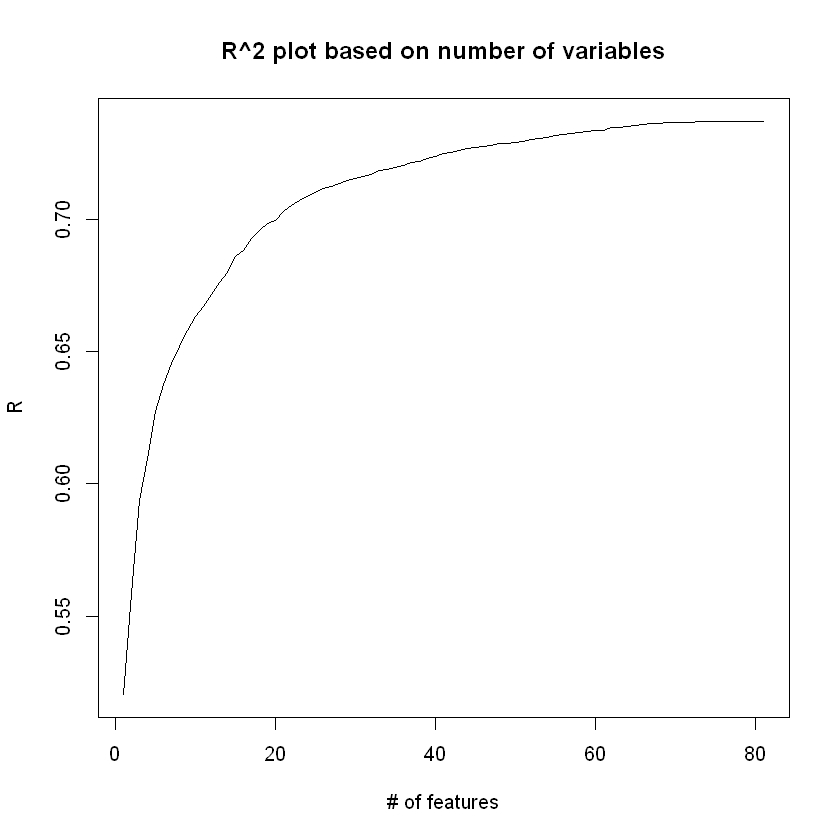

In [6]:
rsq = linearFit.summary$rsq
plot(rsq, main = "R^2 plot based on number of variables", type = "l", xlab = "# of features", ylab = "R")

We notice that, as expected, R^2 has a purely increasing trajectory. This means that we must consider other methods to account for the bias in the model to manage bias-variance tradeoff. We begin by plotting the BIC for the model to acknowledge a penalty for large number of features. 

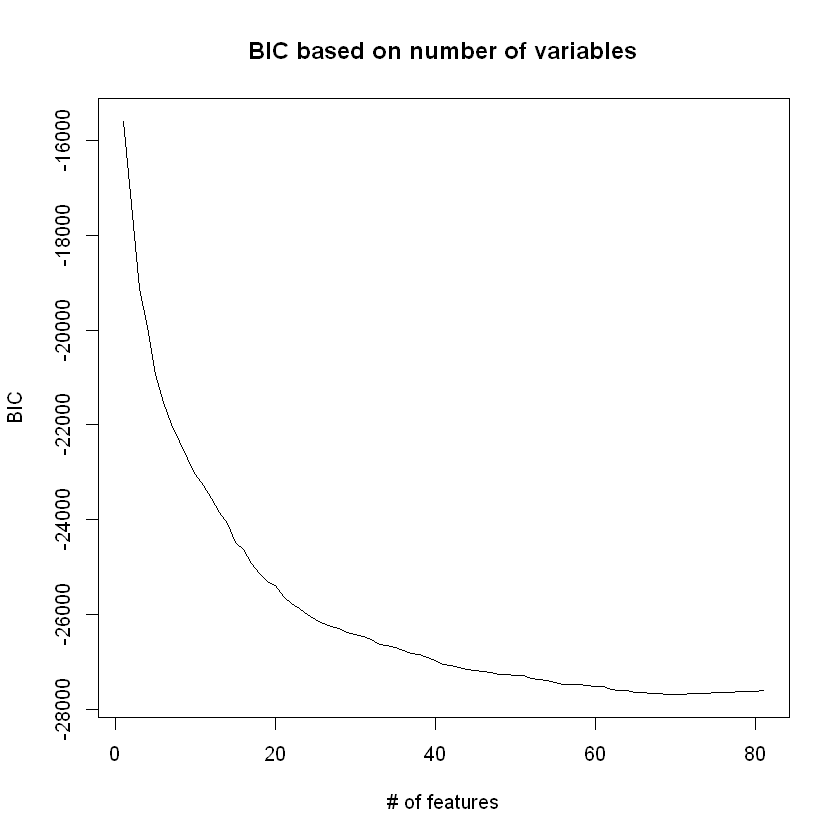

In [7]:
bic = linearFit.summary$bic
plot(bic, type = 'l', main = "BIC based on number of variables", xlab = "# of features", ylab = "BIC")

We want to minimize the BIC. Since it is not purely decreasing, we find the number of variables that minimizes it.

In [8]:
which.min(bic)

[1] 69

This tells us that using BIC as our measure of bias variance tradeoff, we want 69 variables predicting critical temperature. This is still quite alot but we will define the equation before moving on to alternative methods.

In [9]:
coef(linearFit,which.min(bic))

(Intercept)              number_of_elements 
                  -2.059867e+01                   -3.480511e+00 
               mean_atomic_mass            wtd_mean_atomic_mass 
                   7.422525e-01                   -7.495358e-01 
              gmean_atomic_mass           wtd_gmean_atomic_mass 
                  -4.203433e-01                    5.167363e-01 
            entropy_atomic_mass         wtd_entropy_atomic_mass 
                  -3.459445e+01                    1.595196e+00 
              range_atomic_mass                 std_atomic_mass 
                   2.106276e-01                   -4.798544e-01 
            wtd_std_atomic_mass                   wtd_gmean_fie 
                   1.589551e-04                    2.668266e-02 
                    entropy_fie                 wtd_entropy_fie 
                  -8.980979e+01                    4.670566e+01 
                      range_fie                   wtd_range_fie 
                   6.749864e-02                    1.913149e-02 
                        std_fie                     wtd_std_fie 
                  -1.699749e-01                   -4.703314e-02 
         wtd_mean_atomic_radius             gmean_atomic_radius 
                   2.628828e+00                   -3.404016e-01 
        wtd_gmean_atomic_radius           entropy_atomic_radius 
                  -2.227305e+00                    5.445590e+01 
      wtd_entropy_atomic_radius             range_atomic_radius 
                   4.866300e+01                    2.069913e-01 
        wtd_range_atomic_radius               std_atomic_radius 
                  -7.947936e-02                   -5.808309e-01 
          wtd_std_atomic_radius                    mean_Density 
                  -1.429067e-01                   -4.624533e-03 
               wtd_mean_Density                   gmean_Density 
                  -4.465353e-04                    1.093408e-03 
              wtd_gmean_Density                 entropy_Density 
                   2.553038e-03                    1.532368e+01 
            wtd_entropy_Density                   range_Density 
                  -1.710597e+01                   -1.512096e-03 
                    std_Density                 wtd_std_Density 
                   5.508222e-03                   -9.710642e-04 
          mean_ElectronAffinity       wtd_mean_ElectronAffinity 
                  -1.343410e-01                    5.564909e-01 
         gmean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                   2.149578e-01                   -6.146335e-01 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                  -1.881671e+01                   -3.665360e-01 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                  -1.350390e-01                    1.237564e+00 
       wtd_std_ElectronAffinity                 mean_FusionHeat 
                  -5.607161e-01                    1.348522e+00 
            wtd_mean_FusionHeat                gmean_FusionHeat 
                  -1.616532e+00                   -1.237141e+00 
           wtd_gmean_FusionHeat              entropy_FusionHeat 
                   1.350557e+00                   -1.858315e+01 
         wtd_entropy_FusionHeat                range_FusionHeat 
                   2.396758e+01                   -4.720748e-01 
           wtd_range_FusionHeat              wtd_std_FusionHeat 
                   5.249761e-01                    4.890150e-01 
       mean_ThermalConductivity    wtd_mean_ThermalConductivity 
                  -8.360907e-02                    5.483899e-01 
      gmean_ThermalConductivity   wtd_gmean_ThermalConductivity 
                  -4.782161e-02                   -3.416470e-01 
    entropy_ThermalConductivity wtd_entropy_ThermalConductivity 
                   1.196879e+01                    3.680304e-01 
      range_ThermalConductivity   wtd_range_ThermalConductivity 
                  -9.054040e-02                   -2.31

Now we do cross validation for the best possible results in identifying the number of features to predict the critical temerature of a superconuctor. We only cross validate 5 times as 10 fold cross validation takes about 30sec on this data. If we had more time/computational resources, the goal would be to cross validatate ~100 times as there is over 20000 measurements for each parameter. Some of the code here was borrowed from the example in Dr. Samara's lecture notes.

In [10]:
#to be used in cross-validation
predict.regsubsets <- function(object,newdata,id){
  
   form = as.formula(object$call[[2]])
   mat = model.matrix(form,newdata)
   coefi = coef(object,id=id)
   xvars = names(coefi)
   mat[,xvars]%*%coefi
}

In [11]:
niter = 5
RMSE = matrix(NA,niter,81)
k = 10
set.seed(123)

for (itr in 1:niter)
{
    folds = sample(1:k,nrow(data),replace=TRUE)
    cv.errors = matrix(NA,k,81,dimnames=list(NULL,paste(1:81)))

    for(j in 1:k){
       fwd.fit = regsubsets(critical_temp~.,data=data,nbest=1,nvmax=81,method="forward")
       for(i in 1:81){
           
          #function from above
          pred = predict.regsubsets(fwd.fit,data[folds==j,],id=i)
          cv.errors[j,i] = sqrt(mean((data$critical_temp[folds==j]-pred)^2))
       }
    } #end of j-loop

    RMSE[itr,] = apply(cv.errors,2,mean)

} #end of niter-loop

rmse = apply(RMSE,2,mean)

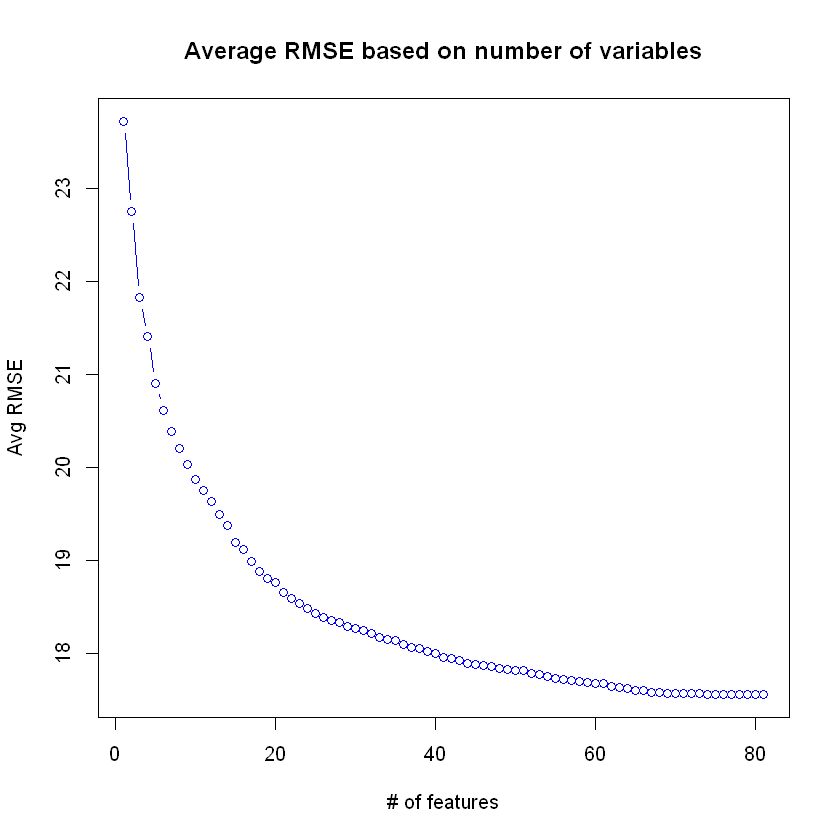

In [12]:
plot(x=1:81,y=rmse,main="Average RMSE based on number of variables", xlab="# of features",ylab="Avg RMSE",type='b',col="blue")

In [13]:
which.min(rmse)

[1] 81

It is concerning that the cross validation leads to using all 81 parameters for fit. We speculate that is is from only cross validating 5 times. As mentioned earlier, this is just an example of the method under computational constraints. If given time and resources, we would run it for at least a few hundered times to be confident in our variable selection. Nevertheless, we print the coefficients of the 81 variable linear equation below.

In [14]:
coef(linearFit,which.min(rmse))

(Intercept)              number_of_elements 
                  -2.080657e+01                   -3.496454e+00 
               mean_atomic_mass            wtd_mean_atomic_mass 
                   8.480417e-01                   -9.040699e-01 
              gmean_atomic_mass           wtd_gmean_atomic_mass 
                  -5.101989e-01                    6.468083e-01 
            entropy_atomic_mass         wtd_entropy_atomic_mass 
                  -3.596059e+01                    4.554522e+00 
              range_atomic_mass           wtd_range_atomic_mass 
                   2.141804e-01                    2.598372e-02 
                std_atomic_mass             wtd_std_atomic_mass 
                  -5.608021e-01                    9.048055e-02 
                       mean_fie                    wtd_mean_fie 
                   1.601050e-01                   -1.787033e-01 
                      gmean_fie                   wtd_gmean_fie 
                  -1.523742e-01                    1.984181e-01 
                    entropy_fie                 wtd_entropy_fie 
                  -1.186988e+02                    4.414394e+01 
                      range_fie                   wtd_range_fie 
                   6.821242e-02                    2.146559e-02 
                        std_fie                     wtd_std_fie 
                  -1.985537e-01                   -2.323115e-02 
             mean_atomic_radius          wtd_mean_atomic_radius 
                  -5.350976e-01                    3.256829e+00 
            gmean_atomic_radius         wtd_gmean_atomic_radius 
                   2.008720e-01                   -2.862455e+00 
          entropy_atomic_radius       wtd_entropy_atomic_radius 
                   7.931628e+01                    4.482423e+01 
            range_atomic_radius         wtd_range_atomic_radius 
                   1.952028e-01                   -9.148190e-02 
              std_atomic_radius           wtd_std_atomic_radius 
                  -3.558332e-01                   -3.317897e-01 
                   mean_Density                wtd_mean_Density 
                  -4.752475e-03                   -1.663516e-04 
                  gmean_Density               wtd_gmean_Density 
                   1.166790e-03                    2.327931e-03 
                entropy_Density             wtd_entropy_Density 
                   1.607315e+01                   -1.978877e+01 
                  range_Density               wtd_range_Density 
                  -1.581731e-03                   -5.201690e-05 
                    std_Density                 wtd_std_Density 
                   6.087638e-03                   -1.583753e-03 
          mean_ElectronAffinity       wtd_mean_ElectronAffinity 
                  -1.096193e-01                    5.172028e-01 
         gmean_ElectronAffinity      wtd_gmean_ElectronAffinity 
                   1.801167e-01                   -5.732268e-01 
       entropy_ElectronAffinity    wtd_entropy_ElectronAffinity 
                   4.487059e+00                   -2.121941e+01 
         range_ElectronAffinity      wtd_range_ElectronAffinity 
                  -3.676864e-01                   -1.389225e-01 
           std_ElectronAffinity        wtd_std_ElectronAffinity 
                   1.243238e+00                   -5.428439e-01 
                mean_FusionHeat             wtd_mean_FusionHeat 
                   1.732928e+00                   -1.942781e+00 
               gmean_FusionHeat            wtd_gmean_FusionHeat 
                  -1.558363e+00                    1.620472e+00 
             entropy_FusionHeat          wtd_entropy_FusionHeat 
                  -1.946226e+01                    2.543965e+01 
               range_FusionHeat            wtd_range_FusionHeat 
                  -3.707968e-01                    6.023502e-01 
                 std_FusionHeat              wtd_std_FusionHeat 
                  -5.614864e-01                    7.59